In [19]:
from ase.visualize import view
import ase
from ase.build import fcc111, bcc111
import numpy as np
import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [15]:
slabA = fcc111('Al', size=(3,3,2))
slabB = bcc111('Fe', size=(3,3,2))
print(slabA)

view(slabA)
view(slabB)

Atoms(symbols='Al18', pbc=[True, True, False], cell=[[8.591347391416553, 0.0, 0.0], [4.295673695708277, 7.440325093703902, 0.0], [0.0, 0.0, 0.0]], tags=...)


In [17]:
slabA.sites

AttributeError: 'Atoms' object has no attribute 'sites'

In [14]:
slabB.get_positions()

array([[-1.08788763e-18,  2.34334519e+00,  0.00000000e+00],
       [ 4.05879292e+00,  2.34334519e+00,  0.00000000e+00],
       [ 8.11758585e+00,  2.34334519e+00,  0.00000000e+00],
       [ 2.02939646e+00,  5.85836297e+00,  0.00000000e+00],
       [ 6.08818939e+00,  5.85836297e+00,  0.00000000e+00],
       [ 1.01469823e+01,  5.85836297e+00,  0.00000000e+00],
       [ 4.05879292e+00,  9.37338075e+00,  0.00000000e+00],
       [ 8.11758585e+00,  9.37338075e+00,  0.00000000e+00],
       [ 1.21763788e+01,  9.37338075e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.28497636e-01],
       [ 4.05879292e+00,  0.00000000e+00,  8.28497636e-01],
       [ 8.11758585e+00,  0.00000000e+00,  8.28497636e-01],
       [ 2.02939646e+00,  3.51501778e+00,  8.28497636e-01],
       [ 6.08818939e+00,  3.51501778e+00,  8.28497636e-01],
       [ 1.01469823e+01,  3.51501778e+00,  8.28497636e-01],
       [ 4.05879292e+00,  7.03003556e+00,  8.28497636e-01],
       [ 8.11758585e+00,  7.03003556e+00

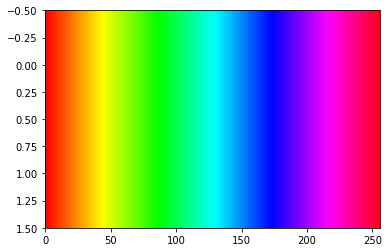

(1.0, 0.1158089393383511, 0.0, 1.0)

In [30]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('hsv'))

plt.show()
plt.get_cmap('hsv')(5)

In [212]:
xlen, ylen, zlen = 8,8,8
unit = np.array([1,1,1])



atoms = np.zeros((xlen * ylen * zlen, 3))

for x in range(xlen):
    for y in range(ylen):
        for z in range(zlen):
            i = x + y*xlen + z*xlen*ylen
            atoms[i] = [x, y, z]
print('atoms', atoms.shape)

unit_norm = unit / np.linalg.norm(unit)
print(unit, unit_norm)

dists = atoms @ unit 
dists -= np.sum(dists) / xlen/ylen/zlen
print('dists', dists.shape)
projs = atoms - np.outer(dists, unit_norm)

ordered_dists = np.sort(dists)
maxd = np.max(np.abs(ordered_dists[:-1] - ordered_dists[1:]))
print('maxd', maxd)

# print(dists)
mod_dists = dists % (maxd*2)
pruned_dists = []
pruned_projs = []
pruned_atoms = []
def pcopy(i, proj):
    for pruned_proj in pruned_projs:
        if np.sum(np.abs(proj - pruned_proj)) < 0.0001:
            return
    pruned_dists.append(mod_dists[i])
    pruned_projs.append(proj)
    pruned_atoms.append(atoms[i])

for i, p in enumerate(projs):
    pcopy(i, p)

pruned_dists = np.array(pruned_dists)
pruned_projs = np.array(pruned_projs)
pruned_atoms = np.array(pruned_atoms, dtype=int)


grid = np.zeros((np.max(pruned_atoms[:, 0])+1, np.max(pruned_atoms[:, 1])+1))
for i, a in enumerate(pruned_atoms):
    x, y, _ = a.astype(int)
    img[x, y] = pruned_dists[i]

atoms (512, 3)
[1 1 1] [0.57735027 0.57735027 0.57735027]
dists (512,)
maxd 1.0


array([[0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5],
       [1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5],
       [0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5],
       [1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5],
       [0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5],
       [1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5],
       [0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5],
       [1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5]])

In [215]:
img = np.zeros((400, 400, 3))
cv2.imshow('img', img)

In [209]:
a = np.array([[x, x, x] for x in range(3)])
print(a.shape, atoms.T.shape)
view(ase.Atoms('N3', positions=atoms[:3].T))
view(ase.Atoms('N3', positions=a))


(3, 3) (3, 512)
